# **About the data set**
This public dataset is part of Airbnb and it includes information to find out more about hosts, geographical availability, neighborhood and reviews. Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**The inspiration for my analysis are the questions below**
* Which are the famous neighborhoods and neighborhood groups among the listings?
* What is the price range of the listings?
* What are the mst common words used in the description?
* Which room types are usually busy ? Is the trend different in different neighborhoods?
* How are the reviews distributed?




# Importing the required libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import datetime

#viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # setting style for the plots

#warnings
import warnings
warnings.filterwarnings("ignore")

#word cloud
from wordcloud import WordCloud, ImageColorGenerator

# Reading the data - Bringing it in

In [2]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv',index_col='id')

# Cleaning the data - Lets make it better

In [3]:
df.shape # shape of data

(48895, 15)

In [4]:
df.head() # first 5 rows of data - 5 by default

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(6)
memory u

In [6]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Zero price** -- Free Rooms?<br>
**Zero Availability** -- Looks like those listings are not available any more and the data is not updated.

# Checking for missing data

In [7]:
df.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing data is one of the most common problem in data cleaning/exploring. There is no standard method of replacing the missing values and the method of imputating them highly depends on the type of problem and the data we are dealing with.

Sometimes, counting the missing data using "*isna()*" function can be misleading because missing data does not always mean NaN values. For example, lets consider the variables 'price' and 'availability_365'. The values for these variables cannot be zeroes practically. But we have such values in this  data.

In [8]:
#dropping the rows with price = 0 or availability_365 = 0
indexNames = df[ (df['price'] == 0) | (df['availability_365'] == 0) ].index
df.drop(indexNames , inplace=True)

# Dropping the duplicate data if any

In [9]:
#dropping the duplicates
df = df.drop_duplicates()

In [10]:
#dropping the columns which may not add extra value to the analysis
df = df.drop(['host_id','latitude','longitude'],axis=1)

# Checking for inconsistent data types

In [11]:
df.dtypes

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
#converting "last_review" to "date_time" data type
df['last_review'] = pd.to_datetime(df['last_review'])

#converting categorical variables into "categorical" data type
cat_var = ['neighbourhood_group','neighbourhood','room_type']
df[cat_var] = df[cat_var].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 2539 to 36487245
Data columns (total 12 columns):
name                              31350 non-null object
host_name                         31346 non-null object
neighbourhood_group               31354 non-null category
neighbourhood                     31354 non-null category
room_type                         31354 non-null category
price                             31354 non-null int64
minimum_nights                    31354 non-null int64
number_of_reviews                 31354 non-null int64
last_review                       26147 non-null datetime64[ns]
reviews_per_month                 26147 non-null float64
calculated_host_listings_count    31354 non-null int64
availability_365                  31354 non-null int64
dtypes: category(3), datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Notice that converting the categorical variables into "category" data type significantly reduced the memory from 6.0+ MB to 2.5+ MB

# Exploring the data - Lets know it better

**** Which are the most popular neighborhood groups among the listings?****

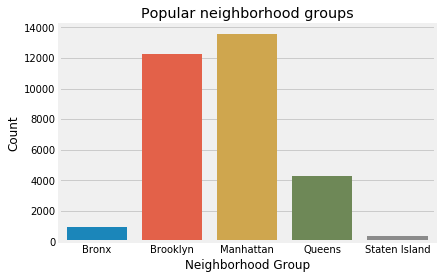

In [13]:
#popular neighborhood groups
ax = sns.countplot(x="neighbourhood_group", data=df)
#df['neighbourhood_group'].value_counts().plot(kind="bar")
plt.title('Popular neighborhood groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.show()

**Manhattan** and **Brooklyn** clearly win the race for popular neighborhoods. Manhattan is the **smallest** of all boroughs in size but the most densly populated and Brooklyn is the city's most populated borough which collectively makes them the most popular neighborhood groups. 

** Which are the most popular neighborhoods among the listings?**

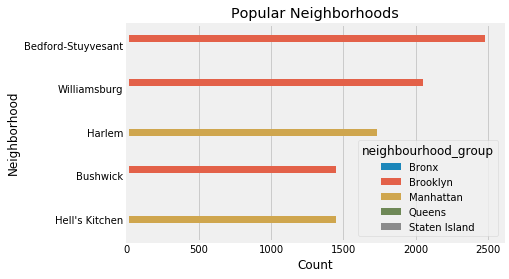

In [14]:
ax = sns.countplot(y="neighbourhood", hue="neighbourhood_group", data=df,
              order=df['neighbourhood'].value_counts().iloc[:5].index)
plt.title('Popular Neighborhoods')
plt.ylabel('Neighborhood')
plt.xlabel('Count')
plt.show()

** Which are the most occupied room types among the listings?**

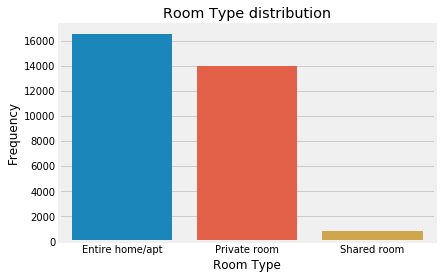

In [15]:
ax = sns.countplot(x="room_type", data=df)
plt.title('Room Type distribution')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()

**Room type distribution in the neighborhood groups**

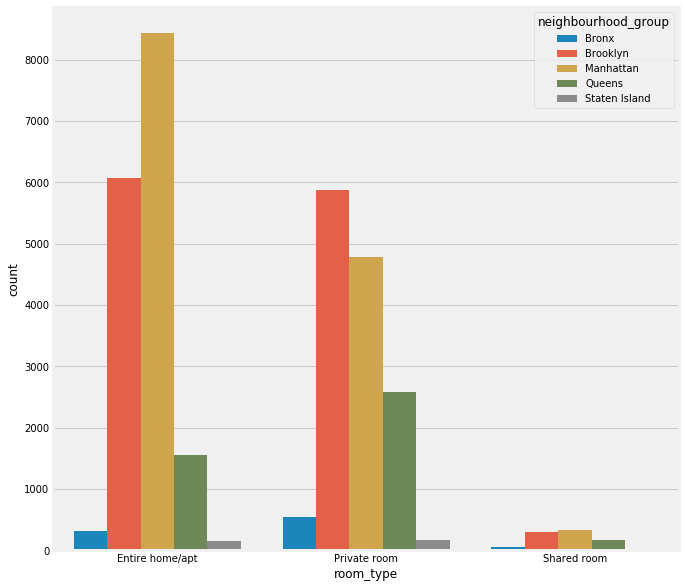

In [16]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="room_type", data=df,hue="neighbourhood_group")

**Exploring the "price" **

In [17]:
df['price'].describe()

count    31354.000000
mean       162.091822
std        254.444750
min         10.000000
25%         70.000000
50%        112.000000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

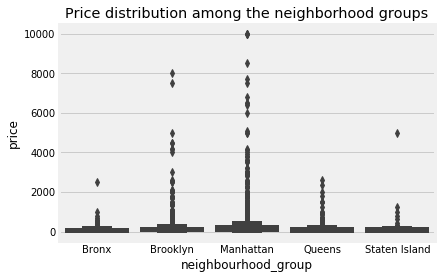

In [18]:
sns.boxplot(x='neighbourhood_group',y='price',data = df)
plt.title("Price distribution among the neighborhood groups")
plt.show()

From the descriptive stats above, we can see that 75% of the prices are below "189".
We cannot declare that the values above $189 are outliers because pricing depends on the amenities offered and the locations they are present.

As majority of the data is below the price range of $189, a new data set is created and its price distribution is observed below.

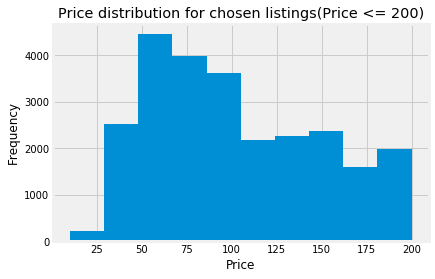

In [19]:
df3 = df[df['price'] <= 200]
df3.price.plot(kind='hist')
plt.xlabel("Price")
plt.title("Price distribution for chosen listings(Price <= 200)")
plt.show()

Most of the listings are between the price range of 25 to 110. 

**Price range distribution among the neighborhoods**

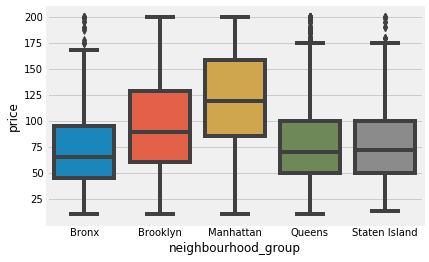

In [20]:
sns.boxplot(x='neighbourhood_group',y='price',data = df3)
plt.show()

Clearly, Manhattan and Brooklyn are the costliest. Manhattan listings have an average price range of 120 dollars, while Brooklyn has 90 dollars. All the other three neighborhoods have almost similar average price range of 70-75 dollars.

**Price range distribution among the room types**

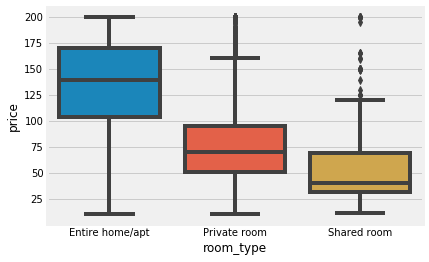

In [21]:
sns.boxplot(x='room_type',y='price',data = df3)
plt.show()

**Distribution of Reviews**

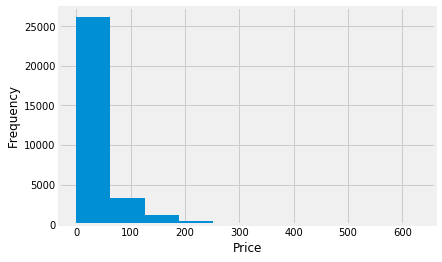

In [22]:
df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.show()

**Distribution of reviews among available room types and neighborhood groups**

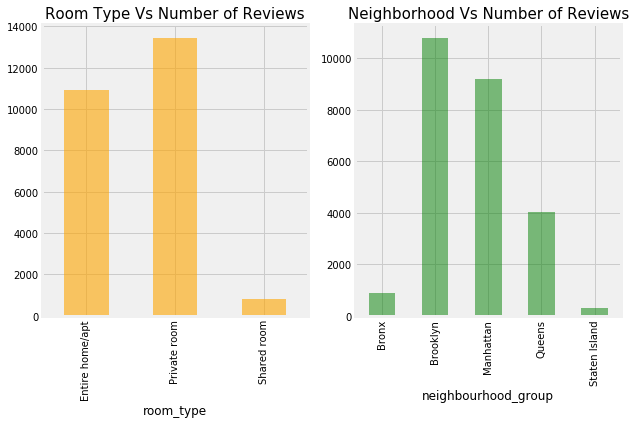

In [23]:
plt.figure(figsize=(9, 6))
plt.subplot(1,2,1)
df3.groupby(['room_type']).count()['number_of_reviews'].plot(kind='bar',alpha = 0.6,color = 'orange')
plt.title('Room Type Vs Number of Reviews',fontsize=15)

plt.subplot(1,2,2)
df3.groupby(['neighbourhood_group']).count()['number_of_reviews'].plot(kind='bar',color='green',alpha=0.5)
plt.title('Neighborhood Vs Number of Reviews',fontsize=15)
plt.tight_layout()
plt.show()

**Distribution of minimum nights among available room types and neighborhood groups**

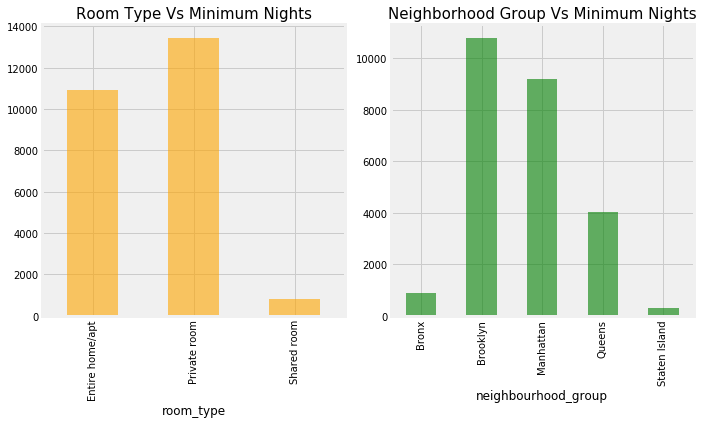

In [24]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
df3.groupby(['room_type']).count()['minimum_nights'].plot(kind='bar',alpha = 0.6,color = 'orange')
plt.title('Room Type Vs Minimum Nights',fontsize=15)

plt.subplot(1,2,2)
df3.groupby(['neighbourhood_group']).count()['minimum_nights'].plot(kind='bar',alpha = 0.6,color = 'green')
plt.title('Neighborhood Group Vs Minimum Nights',fontsize=15)
plt.tight_layout()
plt.show()

**Commonly used words in the description**

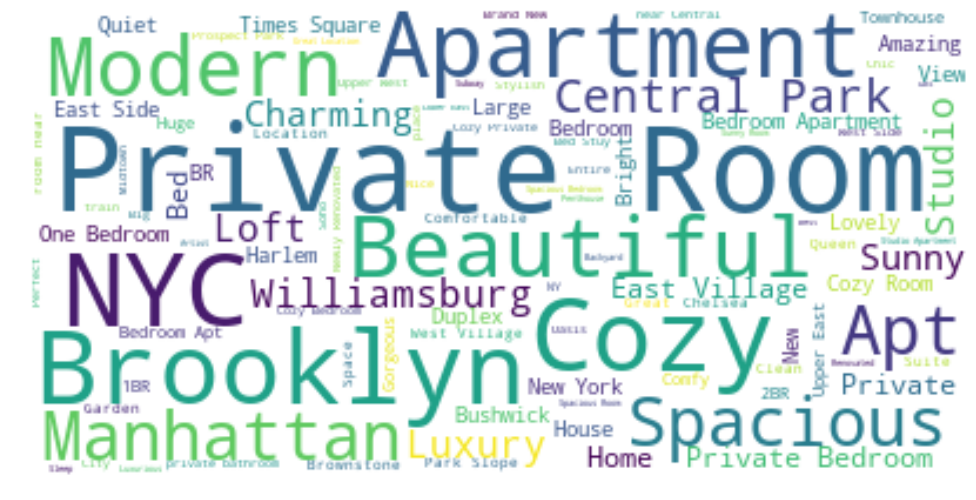

In [25]:
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Correlation among numeric variables**

In [26]:
columns =['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']
#sns.heatmap(df[columns])
corr = df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1,0.0394586,-0.072893,-0.063706,0.0745053
minimum_nights,0.0394586,1,-0.116035,-0.170428,0.125397
number_of_reviews,-0.072893,-0.116035,1,0.488247,0.00983781
reviews_per_month,-0.063706,-0.170428,0.488247,1,-0.0646791
availability_365,0.0745053,0.125397,0.00983781,-0.0646791,1


# **Insights developed :**
* **Manhattan** is the costlies and popular neighborhood groups among the listings followed by **Brooklyn**.
* The top 5 popular neighborhood groups are from Manhattan and Brooklyn.
* Entire Homes are the highly occupied room types followed by Private and Shared rooms.
* Manhattan has high number of Entire Home and Shared room listings. Brooklyn has high private room bookings.
* 75% of the listing's prices are below **189 dollars**.
* **Manhattan** listings have an average price range of **120 dollars**, while **Brooklyn** has **90 dollars**. All the other three neighborhoods have almost similar average price range of **70-75 dollars**.
* Most number of reviews are collected from **Private** room type and the neighborhood of **Brooklyn**.
* There is no strong correlation among the numeric variables.
